# Supervised Learning - Foundations: ReCell 


## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the required libraries
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Overview

- Observations
- Sanity checks

In [4]:
#read data
df=pd.read_csv('used_device_data.csv')
##data observation
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


In [5]:
## Sanity Checks
## check summary of the data: Checking the summary statistics of each variable
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,237.038848,92.302936
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,194.302782,54.701648
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,18.200000,4.650000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,120.342500,56.482500
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,189.785000,81.870000
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,291.115000,116.245000
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,2560.200000,749.520000


The above results show the summary statistcs of each variable in the dataset. This includes observing the maximum, minimum, and mean values of each variable.

It can be observed that there are no negative values in the dataset which would would be a source of concern and trigger the need for some data review and cleaning.

In [6]:
##Check number of NaN/missing values
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

It can be observed that some of the columns have missing/nan values hence this needs to be cleaned.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

In [7]:
df.head(2)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.5,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.3,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53


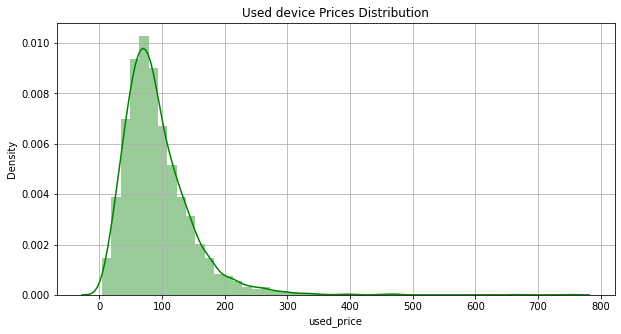

In [8]:
#What does the distribution of used device prices look like?
#check price distribution
plt.figure(figsize=(10,5))
sns.distplot(df['used_price'],color="green")
plt.grid()
plt.title("Used device Prices Distribution")
plt.show()

Used device price varies between 1-300 euros

In [9]:
#What percentage of the used device market is dominated by Android devices?
android = df.groupby('os')['brand_name'].size()
android = pd.DataFrame(android)
android['Percentage'] = 100 * android['brand_name']  / android['brand_name'].sum()
android.rename(columns={'brand_name': 'Count'}, inplace = True)
android

,Count,Percentage
os,,
Android,3214,93.051534
Others,137,3.966416
Windows,67,1.939780
iOS,36,1.042270


Android devices dominates the used device market with a 93.05% market share.

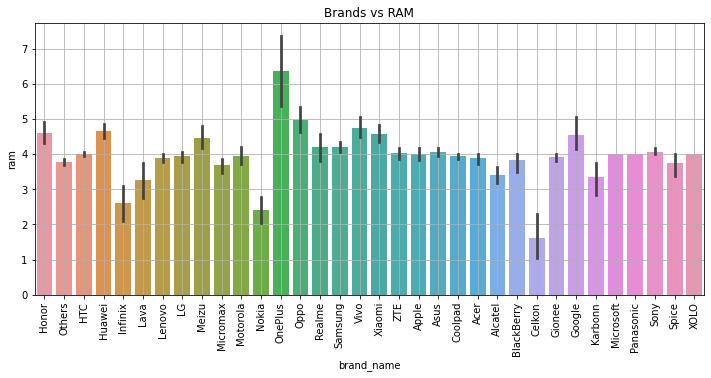

In [10]:
#The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
#ram vs brand
plt.figure(figsize=(12,5))
sns.barplot(df['brand_name'],df['ram'])
plt.grid()
plt.title("Brands vs RAM")
plt.xticks(rotation=90)
plt.show()

It can be observed that the **OnePlus** brand has the largest RAM while **Celkon** brand has the lowest RAM.

In [11]:
#A large battery often increases a device's weight, making it feel uncomfortable in the hands. 
#How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
###Filter data to obtain devices with more than 4500mAh
battery = df[df['battery'] > 4500]
battery.shape[0]

341

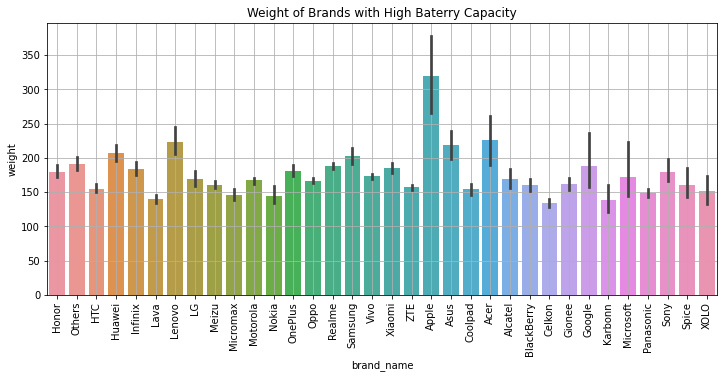

In [12]:
plt.figure(figsize=(12,5))
sns.barplot(df['brand_name'],df['weight'])
plt.grid()
plt.title("Weight of Brands with High Baterry Capacity")
plt.xticks(rotation=90)
plt.show()

It can be observed that there are 341 devices that have battery capacity more than 4500mAh.

Among the brands with large battery capacity, it can be seen that Apple has the heaviest weight with more than 300 grams.

In [13]:
#Bigger screens are desirable for entertainment purposes as they offer a better viewing experience.
#How many phones and tablets are available across different brands with a screen size larger than 6 inches?
###Filter data to obtain brands with a screen size larger than 6 inches
screensize = df[df['screen_size'] > 6]
screensize.shape[0]

screensize['brand_name'].unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

In [14]:
#Bigger screens are desirable for entertainment purposes as they offer a better viewing experience.
#How many phones and tablets are available across different brands with a screen size larger than 6 inches?
###Filter data to obtain brands with a screen size larger than 6 inches
screensize = df[df['screen_size'] > 6]
screensize.shape[0]

screensize['brand_name'].unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

The above results show all brands with a screen size larger than 6 inches.

Such brands include: 'Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo', 'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo', 'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
 'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
 'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice', and 
 'XOLO'

In [15]:
#Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones.
#What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?

###Filter data to obtain devices offering greater than 8MP selfie cameras across brands
selfiecamera = df[df['selfie_camera_mp'] > 8]
selfiecamera.head(2)



,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,200.32,132.43


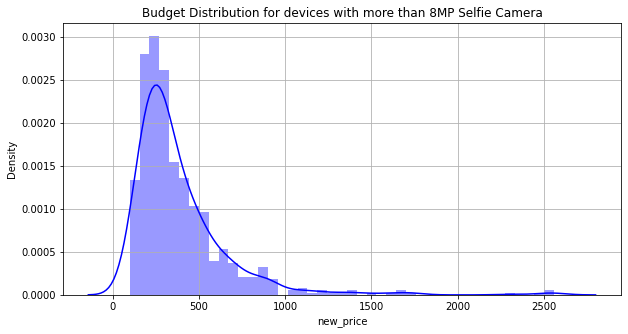

In [16]:
#check price distribution
plt.figure(figsize=(10,5))
sns.distplot(selfiecamera['new_price'],color="blue")
plt.grid()
plt.title("Budget Distribution for devices with more than 8MP Selfie Camera")
plt.show()

It can be observed that the budget for devices with more than 8MP camera is between 100-1000 euros.

However, there are those devices that are sold more than 2500 euros

In [17]:
#Which attributes are highly correlated with the price of a used device?
#correlation between features
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,0.364223,-0.291723,0.340895,0.529275
main_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,0.353728,-0.144672,0.358298,0.459209
selfie_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,0.690942,-0.552636,0.415596,0.614675
int_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,0.235429,-0.242712,0.369145,0.378347
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,0.314203,-0.280066,0.494293,0.529434
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,0.488660,-0.370895,0.370490,0.549647
weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,0.071290,-0.067470,0.219115,0.357983
release_year,0.364223,0.353728,0.690942,0.235429,0.314203,0.488660,0.071290,1.000000,-0.750390,0.303571,0.494910
days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,-0.750390,1.000000,-0.246353,-0.385777
new_price,0.340895,0.358298,0.415596,0.369145,0.494293,0.370490,0.219115,0.303571,-0.246353,1.000000,0.809335


It can be observed that the price of used devices is highly correlated to:
    screen_size,selfie_camera_mp,ram, battery, and new_price
    

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [18]:
##Missing value treatment
## drop all missing values from the data
df2= df.dropna()
##Confirm whether there are NaN/missing values
df2.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

It can be observed that all missing values have been dropped

In [19]:
#outliers
#observe statistics
df2.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3253.000000,3253.000000,3253.00000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000
mean,13.617476,9.476354,6.09379,52.098632,3.962960,3074.926990,182.493637,2015.766370,695.695358,231.672613,89.882604
std,3.851520,4.802200,6.59958,85.442242,1.225895,1296.957619,90.359810,2.187719,235.454084,189.364479,53.084543
min,5.080000,0.080000,0.00000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,18.200000,4.650000
25%,12.700000,5.000000,2.00000,16.000000,4.000000,2100.000000,140.450000,2014.000000,564.000000,120.200000,55.660000
50%,12.830000,8.000000,5.00000,32.000000,4.000000,3000.000000,158.000000,2015.000000,705.000000,189.090000,79.650000
75%,15.320000,13.000000,8.00000,64.000000,4.000000,3950.000000,182.000000,2018.000000,879.000000,280.920000,112.800000
max,30.710000,48.000000,32.00000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,2560.200000,749.520000


It can be observed that there are no extreme large or small values hence it can said that the dataset does not have outliers.

In [20]:
df2.head(3)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85


In [21]:
## Preparing data for modeling
## drop some of the columns that cannot be used in linear regression
df3 = df2.copy()
df3.drop(['brand_name','os','4g','5g','release_year'],axis=1,inplace=True)


In [22]:
##observe final data that will be used for modelling
##working dataset
dataset = df3
dataset.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,new_price,used_price
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,111.62,74.26
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,249.39,174.53
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,359.47,165.85
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,278.93,169.93
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,140.87,80.64


Only the numerical variables are retained for y use in the multiple linear regression model

## EDA

- It is a good idea to explore the data once again after manipulating it.

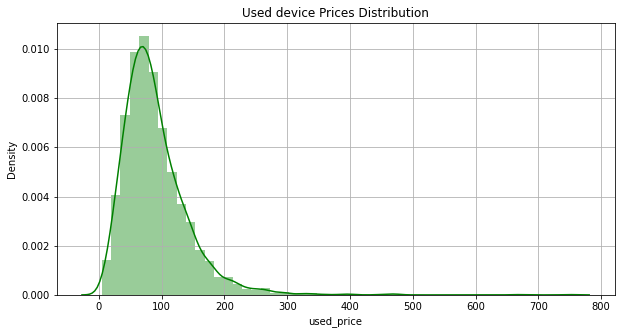

In [23]:
#What does the distribution of used device prices look like?
#check price distribution
plt.figure(figsize=(10,5))
sns.distplot(df2['used_price'],color="green")
plt.grid()
plt.title("Used device Prices Distribution")
plt.show()

In [24]:
#What percentage of the used device market is dominated by Android devices?
android2 = df2.groupby('os')['brand_name'].size()
android2 = pd.DataFrame(android2)
android2['Percentage'] = 100 * android2['brand_name']  / android2['brand_name'].sum()
android2.rename(columns={'brand_name': 'Count'}, inplace = True)
android2

,Count,Percentage
os,,
Android,3024,92.960344
Others,128,3.934829
Windows,65,1.998156
iOS,36,1.106671


Android OS dominates 92.96% of the used device market.

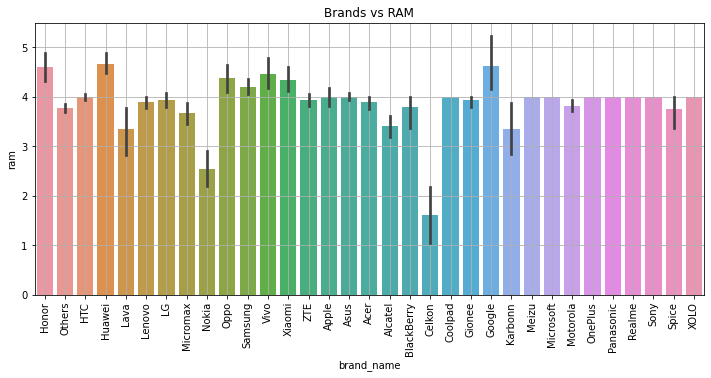

In [26]:
#The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
#ram vs brand
plt.figure(figsize=(12,5))
sns.barplot(df2['brand_name'],df2['ram'])
plt.grid()
plt.title("Brands vs RAM")
plt.xticks(rotation=90)
plt.show()

It can be observed that Honor, Huawei and Google are the brands whose phone have the largest RAM while Celkon brand has the lowest RAM.

In [27]:
#A large battery often increases a device's weight, making it feel uncomfortable in the hands. 
#How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
###Filter data to obtain devices with more than 4500mAh
battery2 = df2[df2['battery'] > 4500]
battery2.shape[0]

287

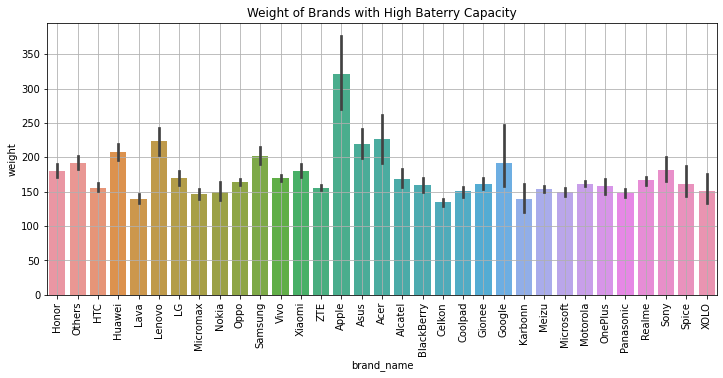

In [28]:
plt.figure(figsize=(12,5))
sns.barplot(df2['brand_name'],df2['weight'])
plt.grid()
plt.title("Weight of Brands with High Battery Capacity")
plt.xticks(rotation=90)
plt.show()

It can be observed that there are 287 devices that a have battery capacity more than 4500mAh

Among the brands with a large battery capacity, it can be seen that Apple phones are the heaviest with more than 300 grams.

In [29]:
#Bigger screens are desirable for entertainment purposes as they offer a better viewing experience.
#How many phones and tablets are available across different brands with a screen size larger than 6 inches?
###Filter data to obtain brands with a screen size larger than 6 inches
screensize2 = df2[df2['screen_size'] > 6]
screensize2.shape[0]

screensize2['brand_name'].unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Lava', 'Lenovo', 'LG',
       'Micromax', 'Nokia', 'Oppo', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE',
       'Apple', 'Asus', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon',
       'Coolpad', 'Gionee', 'Google', 'Karbonn', 'Meizu', 'Microsoft',
       'Motorola', 'OnePlus', 'Panasonic', 'Realme', 'Sony', 'Spice',
       'XOLO'], dtype=object)

The above results show all brands with a screen size larger than 6 inches

Such brands include: 'Honor', 'Others', 'HTC', 'Huawei', 'Lava', 'Lenovo', 'LG',
       'Micromax', 'Nokia', 'Oppo', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE',
       'Apple', 'Asus', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon',
       'Coolpad', 'Gionee', 'Google', 'Karbonn', 'Meizu', 'Microsoft',
       'Motorola', 'OnePlus', 'Panasonic', 'Realme', 'Sony', 'Spice', and 
       'XOLO'.

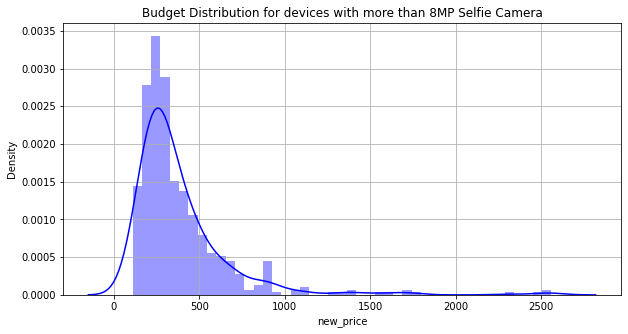

In [30]:
#Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones.
#What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?

###Filter data to obtain devices offering greater than 8MP selfie cameras across brands
selfiecamera2 = df2[df2['selfie_camera_mp'] > 8]
#check price distribution
plt.figure(figsize=(10,5))
sns.distplot(selfiecamera2['new_price'],color="blue")
plt.grid()
plt.title("Budget Distribution for devices with more than 8MP Selfie Camera")
plt.show()

It can be observed that the budget for devices with more than 8MP camera is between 100-1000 euros.

However, there are those devices that are sold more than 2500 euros

In [32]:
#Which attributes are highly correlated with the price of a used device?
#correlation between features
corr2 = df2.corr()
corr2.style.background_gradient(cmap='coolwarm')

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
screen_size,1.000000,0.143849,0.249254,0.050890,0.262861,0.813459,0.835189,0.350407,-0.269821,0.339558,0.527657
main_camera_mp,0.143849,1.000000,0.428405,0.017606,0.256470,0.244746,-0.090950,0.360219,-0.148828,0.355641,0.457155
selfie_camera_mp,0.249254,0.428405,1.000000,0.261604,0.415746,0.340037,-0.014816,0.681868,-0.520170,0.395492,0.591938
int_memory,0.050890,0.017606,0.261604,1.000000,0.040351,0.093695,0.009521,0.205787,-0.213927,0.342593,0.346711
ram,0.262861,0.256470,0.415746,0.040351,1.000000,0.261317,0.086392,0.270889,-0.225667,0.453624,0.480676
battery,0.813459,0.244746,0.340037,0.093695,0.261317,1.000000,0.716757,0.456181,-0.325877,0.373699,0.549809
weight,0.835189,-0.090950,-0.014816,0.009521,0.086392,0.716757,1.000000,0.072055,-0.066328,0.223602,0.368214
release_year,0.350407,0.360219,0.681868,0.205787,0.270889,0.456181,0.072055,1.000000,-0.711607,0.295952,0.482852
days_used,-0.269821,-0.148828,-0.520170,-0.213927,-0.225667,-0.325877,-0.066328,-0.711607,1.000000,-0.227404,-0.355394
new_price,0.339558,0.355641,0.395492,0.342593,0.453624,0.373699,0.223602,0.295952,-0.227404,1.000000,0.807562


It can be observed that the price of used devices is highly correlated to: screen_size,selfie_camera_mp, battery, and new_price

## Building a Linear Regression model

In [33]:
dataset.columns.unique()

Index(['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
       'ram', 'battery', 'weight', 'days_used', 'new_price', 'used_price'],
      dtype='object')

In [34]:
#Setting the values for independent (X) variable and dependent (Y) variable
##Setting the value for X and Y
x = dataset[['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
       'ram', 'battery', 'weight', 'days_used', 'new_price',]]
y = dataset['used_price']

In [35]:
#Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

The dataset has been split into 70-30 ration whereby  there is 70% training data and 30% tes data

In [36]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [37]:
# model Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -10.973465657690227
Coefficients:


[('screen_size', 0.9429081440905064),
 ('main_camera_mp', 1.5968577529845587),
 ('selfie_camera_mp', 2.0549152923413976),
 ('int_memory', 0.03870377192879201),
 ('ram', 1.652155822284747),
 ('battery', -0.0003222227267332123),
 ('weight', 0.12329222783029688),
 ('days_used', -0.006630871977548525),
 ('new_price', 0.14960859629225404)]

In [38]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))## remove # to observe all predicted price values

Prediction for test set: [ 83.99477267 114.36169339  49.38395518  97.30930199  58.95474273
 159.43910359  54.53754447  57.29328957  42.7840872  156.16694573
  32.35089398  71.82175961  82.39112583  10.8546928   41.37641569
  43.48600618  31.50050717 103.2854742   72.31606582  95.10482688
   5.07982039 107.87205317 117.48173823 119.93566294  95.25064094
  94.80402182  64.3403415  126.90070982  91.91396259 116.64049468
  47.31694259 143.37897885  34.1060274  163.30709291  43.24852961
  59.15894394  80.78746367  63.83702898  76.70078047 172.04994195
  74.10727217 107.7894225   96.43586526 122.84277396  58.22644196
  68.70298926 121.79438454 132.17816324  97.62851898  34.53185512
  50.97178547  69.50706832  47.48097679 142.06083944  85.05525401
  55.54293077 226.69075297  89.73289906  60.83822723  30.01942034
 156.5899558   75.91521619 114.03236126  74.68857957 105.74151391
  70.11590918  99.51118338  55.03179927 122.73455754  98.52472986
  54.57590816  83.37861463 154.21647783  44.9900559

In [39]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
1509,95.70,83.994773
2916,131.19,114.361693
2463,53.06,49.383955
2252,109.41,97.309302
1992,63.84,58.954743


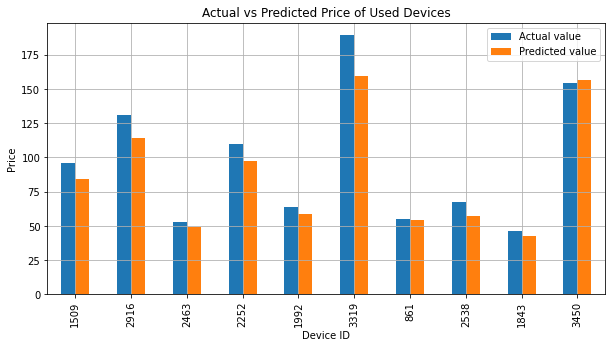

In [40]:
#observe first 10 customers prediction
mlr_diff = mlr_diff.head(10)
#plt.grid()
mlr_diff.plot(kind='bar',figsize=(10,5),grid=True)
plt.title("Actual vs Predicted Price of Used Devices")
plt.xlabel("Device ID")
plt.ylabel("Price")
plt.show() #We get a bar graph that shows the Actual and Predicted values

The above results show the actual price versus the predicted price of used devices. It can be observed that the device with ID 3450 will likely have a high price in future.

## Model performance evaluation

In [41]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 81.66
Mean Absolute Error: 16.20902616668182
Mean Square Error: 599.5870789923458
Root Mean Square Error: 24.486467262395077


Mean Absolute Error: Mean Absolute Error is the absolute difference between the actual or true values and the predicted values. The lower the value, the better is the model’s performance. A mean absolute error of 0 means that the model is a perfect predictor of the outputs. The mean absolute error obtained for this particular model is 16.2, which is pretty good .
    
Mean Square Error: Mean Square Error is calculated by taking the average of the square of the difference between the original and predicted values of the data. The lower the value, the better is the model’s performance. The mean square error obtained for this particular model is 599.59, which is not pretty good.
    
Root Mean Square Error: Root Mean Square Error is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as Mean Squared Error, but the root of the value is considered while determining the accuracy of the model. The lower the value, the better is the model’s performance. The root mean square error obtained for this particular model is 24.49, which is pretty good.


The Multiple Linear Regression model performs fairly well as 81.66% of the data fit the regression model. Also, the mean absolute error, and the root mean square error are lower.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

#### Linearity assumption

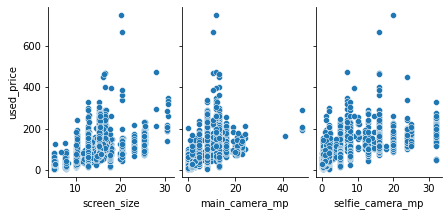

In [42]:
##Linearity assumption
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(dataset, x_vars=['screen_size', 'main_camera_mp', 'selfie_camera_mp'], y_vars='used_price', size=3, aspect=0.7)

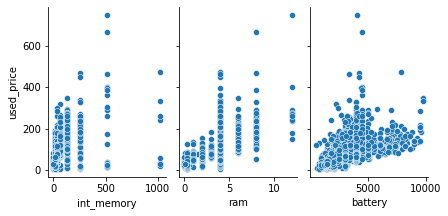

In [43]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(dataset, x_vars=['int_memory',
       'ram', 'battery'], y_vars='used_price', size=3, aspect=0.7)

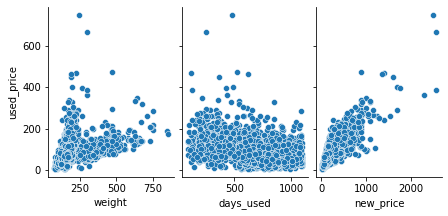

In [44]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(dataset, x_vars=['weight', 'days_used', 'new_price'], y_vars='used_price', size=3, aspect=0.7)

It can be observed that the linearity assumption is met by all  variables except internal memeory size variable  which seems to have a lower relationship with used device price

#### Mean of Residuals

In [45]:
##check Mean of Residuals
y_pred_mlrr = mlr.predict(x_train)
residuals = y_train.values-y_pred_mlrr
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.7599741017509728e-15


One of the assumptions of linear regression is that the mean of the residuals should be zero. The  mean of residuals is closer to 
zero hence the model satisfies this assumption.

#### Homoscedasticity

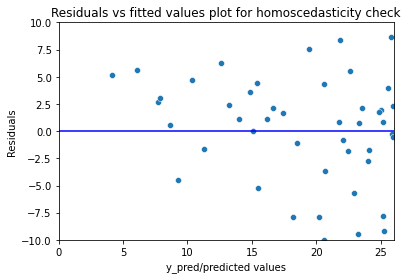

In [46]:
p = sns.scatterplot(y_pred_mlrr,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms. Hence, this assumption has been met.

## Final Model Summary

In [ ]:
##model summary
mlr.coef_

array([ 9.42908144e-01,  1.59685775e+00,  2.05491529e+00,  3.87037719e-02,
        1.65215582e+00, -3.22222727e-04,  1.23292228e-01, -6.63087198e-03,
        1.49608596e-01])

The final multiple linear equation can be given as:
    
**Used Phone Price = -10.97 + screen_size(0.94)+main_camera_mp(1.59)+selfie_camera_mp(2.05)+
 int_memory(0.038)+ ram(1.65)- battery(0.00032)+ weight(0.12)-days_used(0.0066)+ new_price(0.14)+e**
